# Matplotlib

## Figure와 Axes 

In [2]:
import matplotlib.pyplot as plt

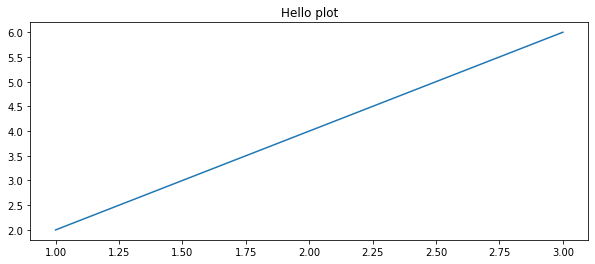

In [4]:
# plt.figure()는 주로 figure의 크기를 조절하는 데 사용됨.
plt.figure(figsize=(10, 4)) # figure 크기가 가로 10, 세로 4인 Figure객체를 설정하고 반환함. 

plt.plot([1, 2, 3], [2, 4, 6]) 
plt.title("Hello plot") 
plt.show()

In [3]:
figure = plt.figure(figsize=(10, 4))
print(type(figure))

<class 'matplotlib.figure.Figure'>


<Figure size 720x288 with 0 Axes>

<class 'matplotlib.axes._subplots.AxesSubplot'>


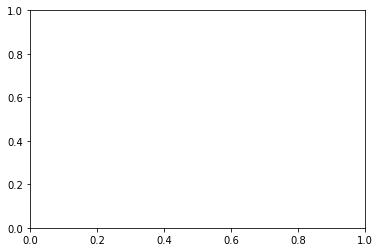

In [4]:
ax = plt.axes()
print(type(ax))

## 여러개의 plot을 가지는 figure 설정 

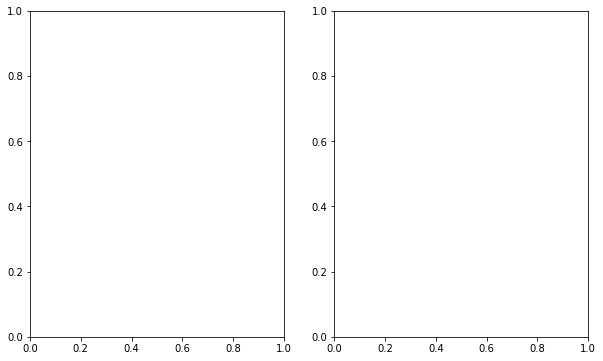

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

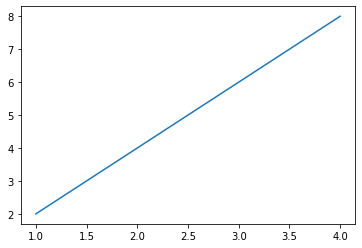

In [8]:
import pandas as pd 

df = pd.DataFrame({'x_value':[1, 2, 3, 4],
                   'y_value':[2, 4, 6, 8]})

# 입력값으로 pandas Series 및 DataFrame도 가능. 
plt.plot(df['x_value'], df['y_value']);

In [12]:
df

,x_value,y_value
0,1,2
1,2,4
2,3,6
3,4,8


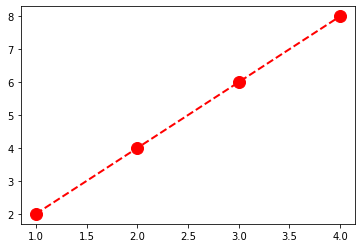

In [18]:
# API 기반으로 시각화를 구현할 때는 함수의 인자들에 대해서 알고 있어야 하는 부작용(?)이 있음. 
plt.plot(x_value, y_value, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12);

## x축, y축에 축명을 텍스트로 할당. xlabel, ylabel 적용

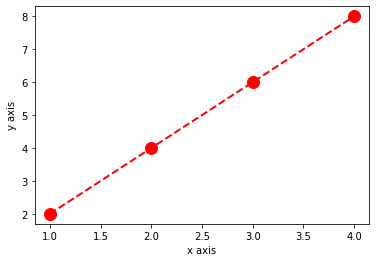

In [19]:
plt.plot(df.x_value, df.y_value, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

## 여러개의 subplots을 가지는 Figure를 생성하고 여기에 개별 그래프를 시각화
* nrows가 1일 때는 튜플로 axes를 받을 수 있음. 
* nrows나 ncols가 1일때는 1차원 배열형태로, nrows와 ncols가 1보다 클때는 2차원 배열형태로 axes를 추출해야 함. 

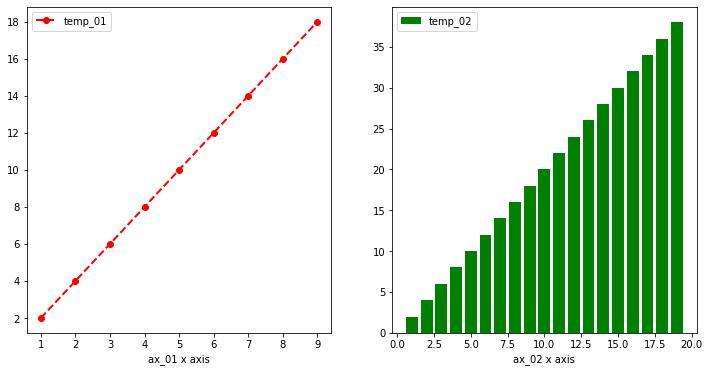

In [11]:
x_value_01 = np.arange(1, 10)
x_value_02 = np.arange(1, 20)
y_value_01 = 2 * x_value_01
y_value_02 = 2 * x_value_02

fig, (ax_01, ax_02) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax_01.plot(x_value_01, y_value_01, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6, label='temp_01')
ax_02.bar(x_value_02, y_value_02, color='green', label='temp_02')

ax_01.set_xlabel('ax_01 x axis')
ax_02.set_xlabel('ax_02 x axis')

ax_01.legend()
ax_02.legend() 

#plt.legend()
plt.show()

# Seaborn

## 타이타닉 데이터세트 로딩하기

In [1]:
import pandas as pd

df = pd.read_csv('./data/titanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## histogram
* 연속값에 대한 구간별 도수 분포를 시각화

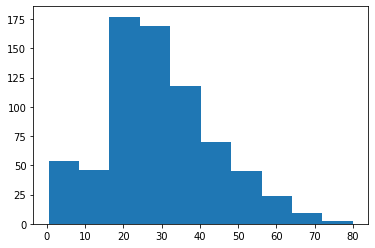

In [2]:
### matplotlib histogram
import matplotlib.pyplot as plt

plt.hist(df['Age'])
plt.show()

### seaborn histogram
* seaborn의 예전 histogram은 distplot함수지만 deprecate됨. 
* seaborn의 histogram은 histplot과 displot이 대표적이며 histplot은 axes레벨, displot은 figure레벨임.

C:\Dev\Miniconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

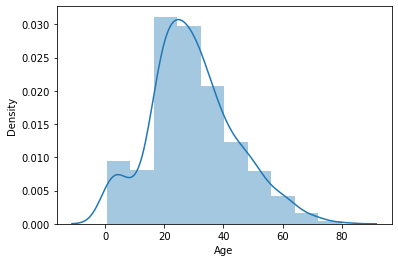

In [3]:
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

sns.distplot(df['Age'], bins=10)

In [4]:
# distplot은 x, data와 같이 컬럼명을 x인자로 설정할 수 없음. 
sns.histplot(x='Age', data=df)

TypeError: distplot() got an unexpected keyword argument 'data'

<AxesSubplot:xlabel='Age', ylabel='Count'>

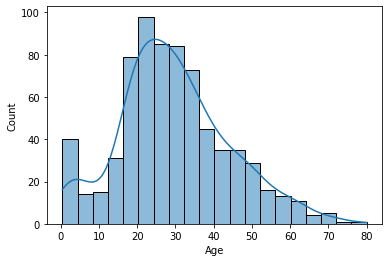

In [19]:
### seaborn histogram
import seaborn as sns

# seaborn에서도 figure로 canvas의 사이즈를 조정
#plt.figure(figsize=(10, 6))
# Pandas DataFrame의 컬럼명을 자동으로 인식해서 xlabel값을 할당. ylabel 값은 histogram일때 Count 할당. 
sns.histplot(df['Age'], kde=True)
#plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

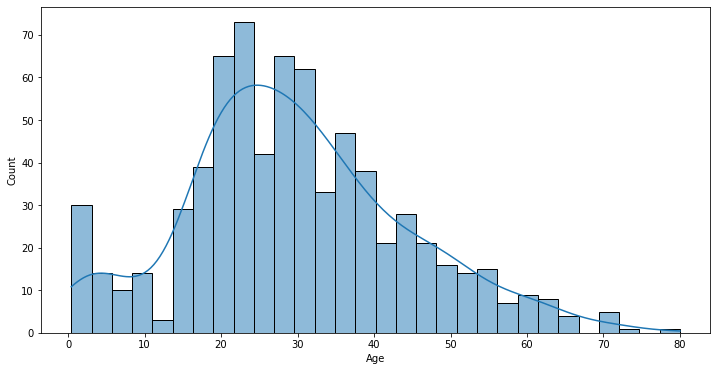

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=df, kde=True, bins=30)

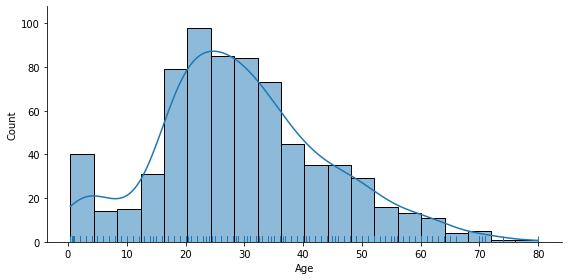

In [23]:
import seaborn as sns

# seaborn의 figure레벨 그래프는 plt.figure로 figure 크기를 조절할 수 없습니다. 
#plt.figure(figsize=(4, 4))
# Pandas DataFrame의 컬럼명을 자동으로 인식해서 xlabel값을 할당. ylabel 값은 histogram일때 Count 할당. 
sns.displot(df['Age'], kde=True, rug=True, height=6, aspect=2)
#plt.show()

## countplot
- 카테고리 값에 대한 건수를 표현. x축이 카테고리값, y축이 해당 카테고리값에 대한 건수

<AxesSubplot:xlabel='Pclass', ylabel='count'>

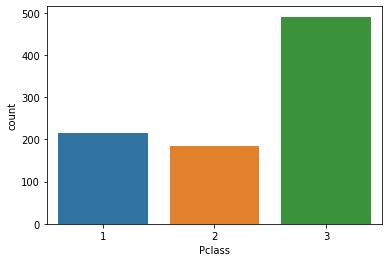

In [25]:
sns.countplot(x='Pclass', data=df) # valuecount를 한 것을 시각화

## barplot
- seaborn의 barplot은 x축은 이산값(주로 category값), y축은 연속값(y값의 평균/총합)을 표현

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

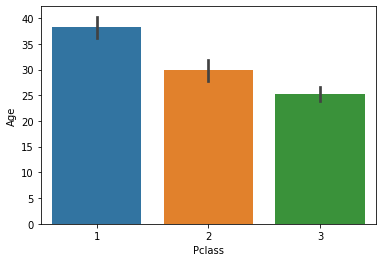

In [26]:
#plt.figure(figsize=(10, 6))
# 자동으로 xlabel, ylabel을 x입력값, y입력값으로 설정. 
sns.barplot(x='Pclass', y='Age', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Sex'>

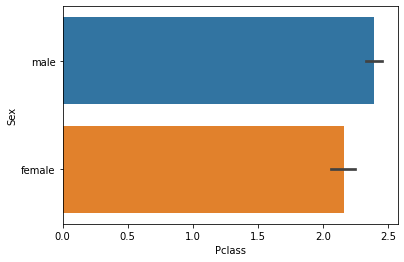

In [28]:
### 수직 barplot에 y축을 문자값으로 설정하면 자동으로 수평 barplot으로 변환
sns.barplot(x='Pclass', y='Sex', data=df)

### barplot에서 hue를 이용
- X값을 특정 컬럼별로 세분화하여 시각화 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

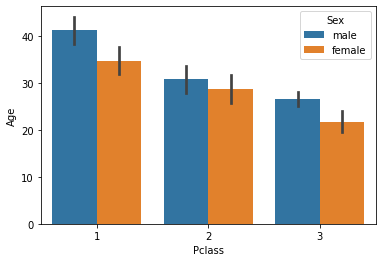

In [55]:
# 아래는 Pclass가 X축값이며 hue파라미터로 Sex를 설정하여 개별 Pclass 값 별로 Sex에 따른 Age 평균 값을 구함. 
sns.barplot(x='Pclass', y='Age', hue='Sex', data=df)

## violinplot
* 단일 컬럼에 대해서는 히스토그램과 유사하게 연속값의 분포도를 시각화. 또한 중심에는 4분위를 알수있음. 
* 보통은 X축에 설정한 컬럼의 개별 이산값 별로 Y축 컬럼값의 분포도를 시각화하는 용도로 많이 사용 

<AxesSubplot:ylabel='Age'>

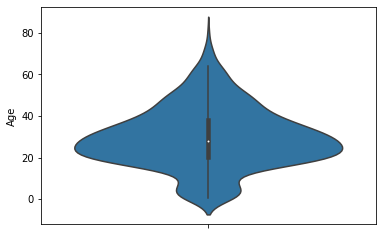

In [31]:
# Age 컬럼에 대한 연속 확률 분포 시각화 
sns.violinplot(y='Age', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

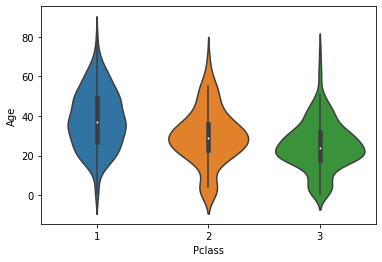

In [33]:
# x축값인 Pclass의 값별로 y축 값인 Age의 연속분포 곡선을 알 수 있음. 
sns.violinplot(x='Pclass', y='Age', data=df)

## boxplot
* 4분위를 박스 형태로 표현
* x축값에 이산값을 부여하면 이산값에 따른 box plot을 시각화

<AxesSubplot:ylabel='Age'>

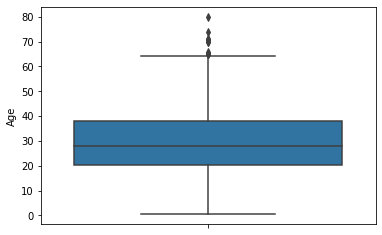

In [56]:
sns.boxplot(y='Age', data=df)

## scatterplot
* 산포도로서 X와 Y축에 보통 연속형 값을 시각화. hue, style등을 통해 breakdown 정보를 표출할 수 있습니다. 

<AxesSubplot:xlabel='Age', ylabel='Fare'>

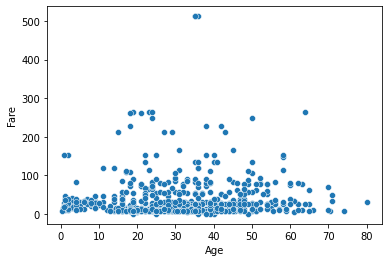

In [39]:
sns.scatterplot(x='Age', y='Fare', data=df)

## seaborn에서 subplots 이용하기 

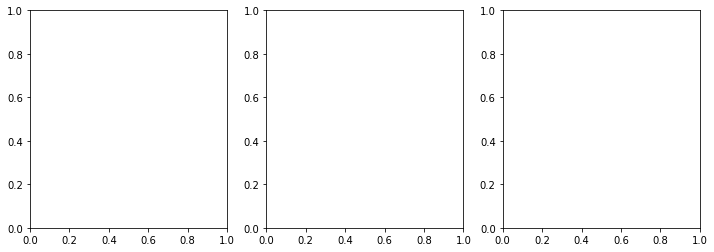

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

index: 0
index: 1
index: 2


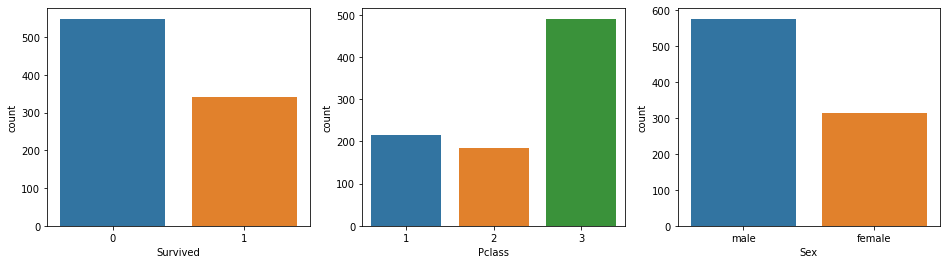

In [69]:
cat_columns = ['Survived', 'Pclass', 'Sex']

# nrows는 1이고 ncols는 컬럼의 갯수만큼인 subplots을 설정. 
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(16, 4))

for index, column in enumerate(cat_columns):
    print('index:', index)
    # seaborn의 Axes 레벨 function들은 ax인자로 subplots의 어느 Axes에 위치할지 설정. 
    sns.countplot(x=column, data=df, ax=axs[index])
    # if index == 3:
    #     # plt.xticks(rotation=90)으로 간단하게 할수 있지만 Axes 객체를 직접 이용할 경우 API가 상대적으로 복잡. 
    #     axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=90)

## 상관 Heatmap
* 컬럼간의 상관도를 Heatmap형태로 표현

<AxesSubplot:>

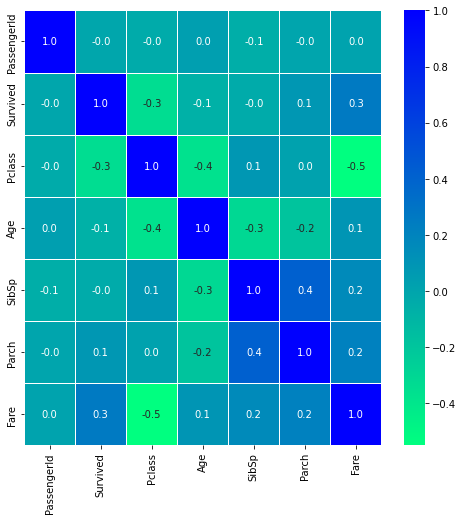

In [67]:
### 상관 Heatmap

plt.figure(figsize=(8, 8))

# DataFrame의 corr()은 숫자형 값만 상관도를 구함. 
corr = df.corr()

sns.heatmap(corr, annot=True,  fmt='.1f', linewidths=0.5, cmap='winter_r')
#sns.heatmap(corr, annot=True, fmt='.2g', cbar=True, linewidths=0.5, cmap='YlGnBu')

# Problems

## 학생 성적에 관한 소규모 데이터의 시각화 포함 탐색적 자료 분석을 시행 하시오

### 기본 코드

In [43]:
# 기본 코드 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('./data/student_data.csv')
df.head()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


### 학생 성적의 분포를 시각화 하여 확인 하세요

<BarContainer object of 19 artists>

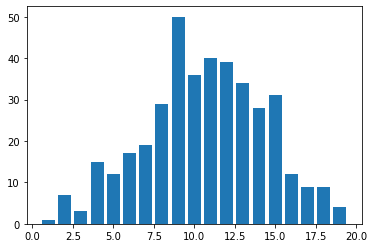

In [44]:
plt.bar()

<AxesSubplot:xlabel='grade', ylabel='Count'>

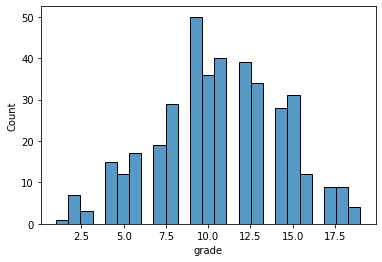

In [50]:
sns.histplot()

### 각 변수들간의 상관 관계를 시각화 하세요.

<AxesSubplot:>

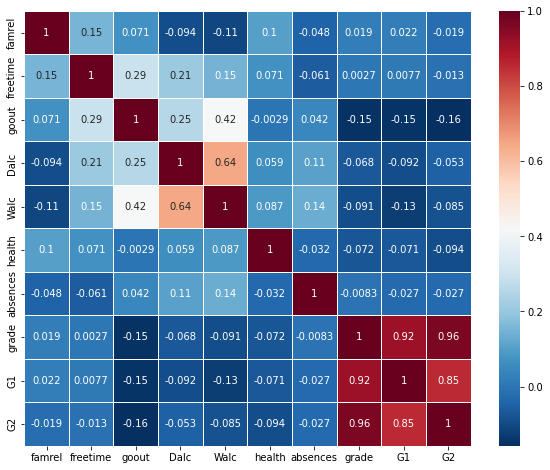

In [54]:
plt.figure(figsize=(10, 8))
df_cor = df.corr()
sns.heatmap()

## 당뇨병 유무와 신체검사 데이터의 시각화를 시행하시오.

### 기본 코드

In [74]:
# 기본 코드 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('./data/diabetes_for_test.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

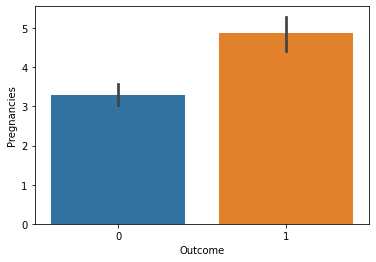

In [81]:
sns.barplot(x =  'Outcome', y = 'Pregnancies', data = df)

In [83]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

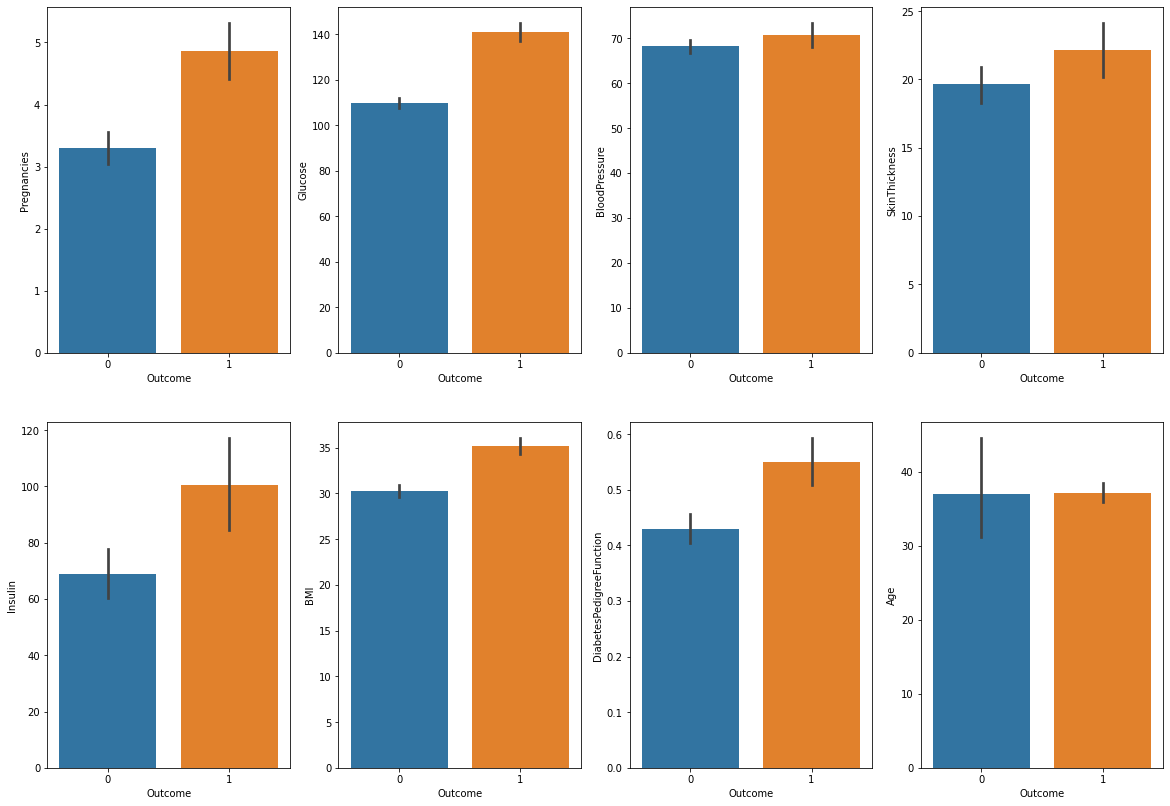

In [84]:
import matplotlib.pyplot as plt

cols = list(df.columns[:-1])
fig, axes = plt.subplots(2,4, figsize = (20, 14))
for idx, col in enumerate(cols):
    nrow = idx // 4
    ncol = idx % 4
    sns.barplot(x = 'Outcome', y = col, data = df, ax = axes[nrow][ncol])

### 당뇨병 유무에 따른 독립변수들의 분포를 시각화 하시오.

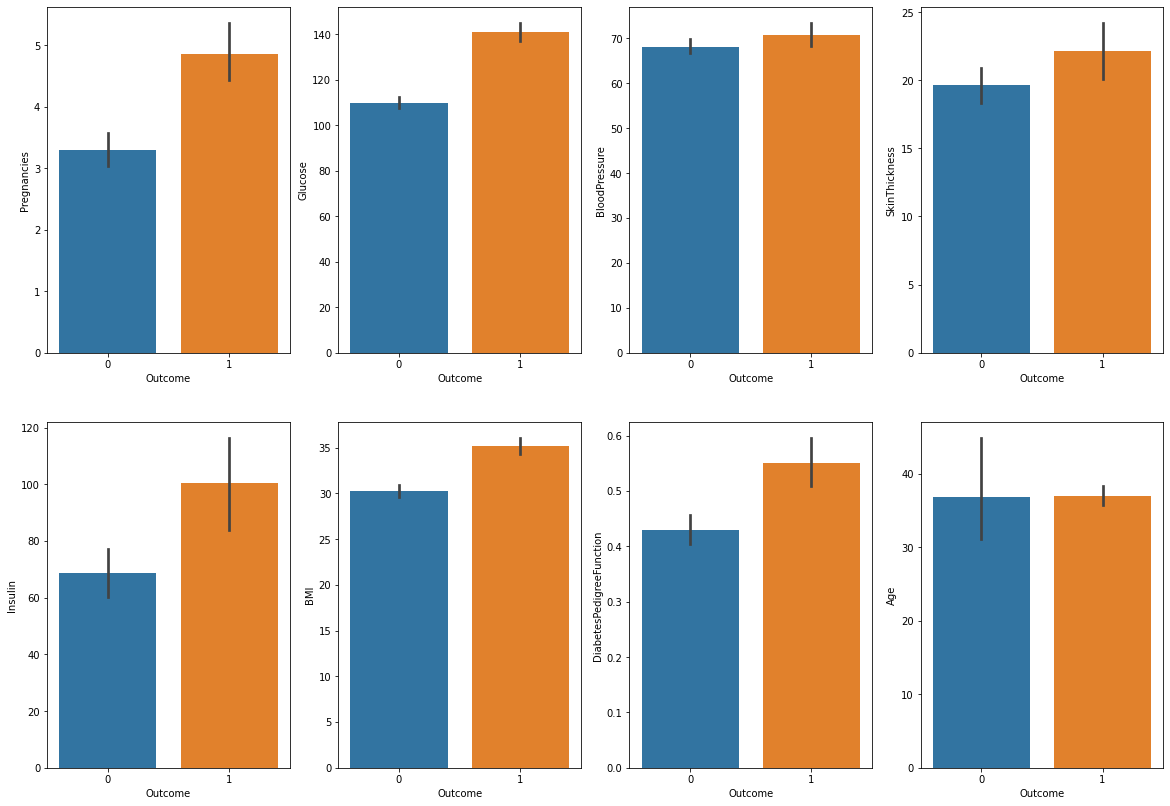

In [79]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,14))

for index, col in enumerate(cols):
    pass

### 각 변수들간의 상관 관계를 시각화 하세요.

<AxesSubplot:>

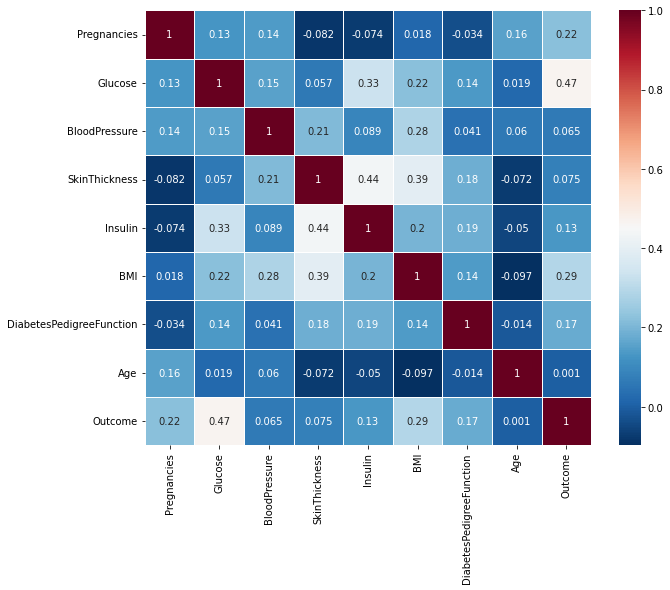

## 동행지수 순환변동치와 선행지수 순환변동치를 시각화 하시오
- 아래는, 경기종합지수 (순환변동치)를 2021년 7월 부터 2022년 7월 까지, 1년간의 시각화를 한 것이다.
- 2008년 1월 부터 2022년 7월 까지의 값을 시각화 하라
- 소스 : https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1057

<img src="img/rMateChart_1057011.png" width="500"/>

### 용어 해설
    (1) 선행종합지수는 앞으로의 경기동향을 예측하는 지표로서 구인구직비율, 건설수주액, 재고순환지표 등과 같이 앞으로 일어날 경제현상을 미리 알려주는 9개 지표들의 움직임을 종합하여 작성함
    (2) 동행종합지수는 현재의 경기상태를 나타내는 지표로서 광공업생산지수, 소매판매액지수, 비농림어업취업자수 등과 같이 국민경제 전체의 경기변동과 거의 동일한 방향으로 움직이는 7개 지표로 구성됨

### 기본코드

#### matplotlib 한글화 코드

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:title={'center':'한글'}>

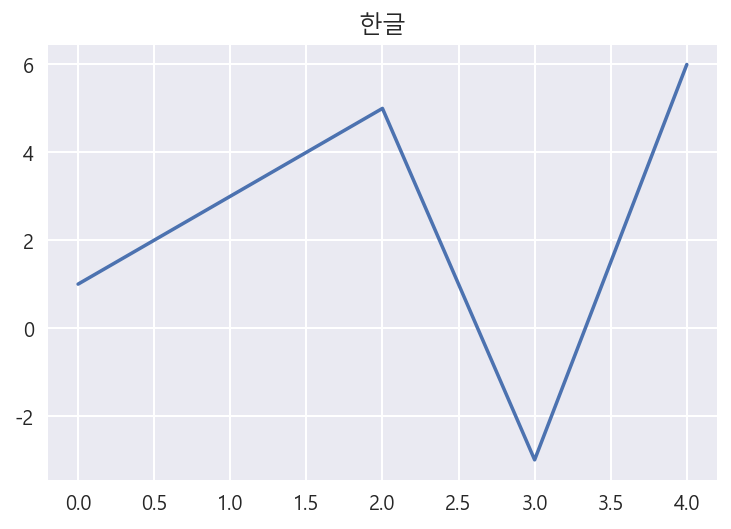

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

def get_font_family():
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    elif system_name == "Linux":
        font_family = "NanumGothic"     
    return font_family

font_family = get_font_family()

# 사용가능한 폰트 스타일
print(plt.style.available)

# 그래프 스타일 설정
plt.style.use('seaborn')

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format='retina'

plt.figure(figsize=(6,4))
# 한글폰트 확인
pd.Series([1,3,5,-3,6]).plot(title='한글')

#### 데이터 불러오기

In [86]:
import pandas as pd

filepath = './data/stat_105701.xls'
df=pd.read_excel(filepath,sheet_name='Sheet0', header=2, index_col='Unnamed: 0').iloc[:2,:].T.astype('float')
df

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

### 데이터 전처리
- '월'을 15로 바꿔 주기 (매월 중순에 지수가 발표됨)

In [87]:
df.index=pd.to_datetime(df.index, format='%Y%m%d')
df

ValueError: time data '0' does not match format '%Y%m%d' (match)

- index를 년-월-일 형식으로 변경

,동행지수순환변동치,선행지수순환변동치
2008-01-01,102.4,101.1
2008-02-01,102.3,100.5
2008-03-01,102.3,100.0
2008-04-01,102.0,99.8
2008-05-01,101.7,99.5
...,...,...
2022-03-01,101.5,99.8
2022-04-01,101.1,99.6
2022-05-01,101.2,99.6
2022-06-01,101.3,99.7


### 시각화 하기
- 2008년 1월 부터 2022년 7월 까지의 동행지수순환변동치 과 선행지수순환변동치 를 동시에 그리시오

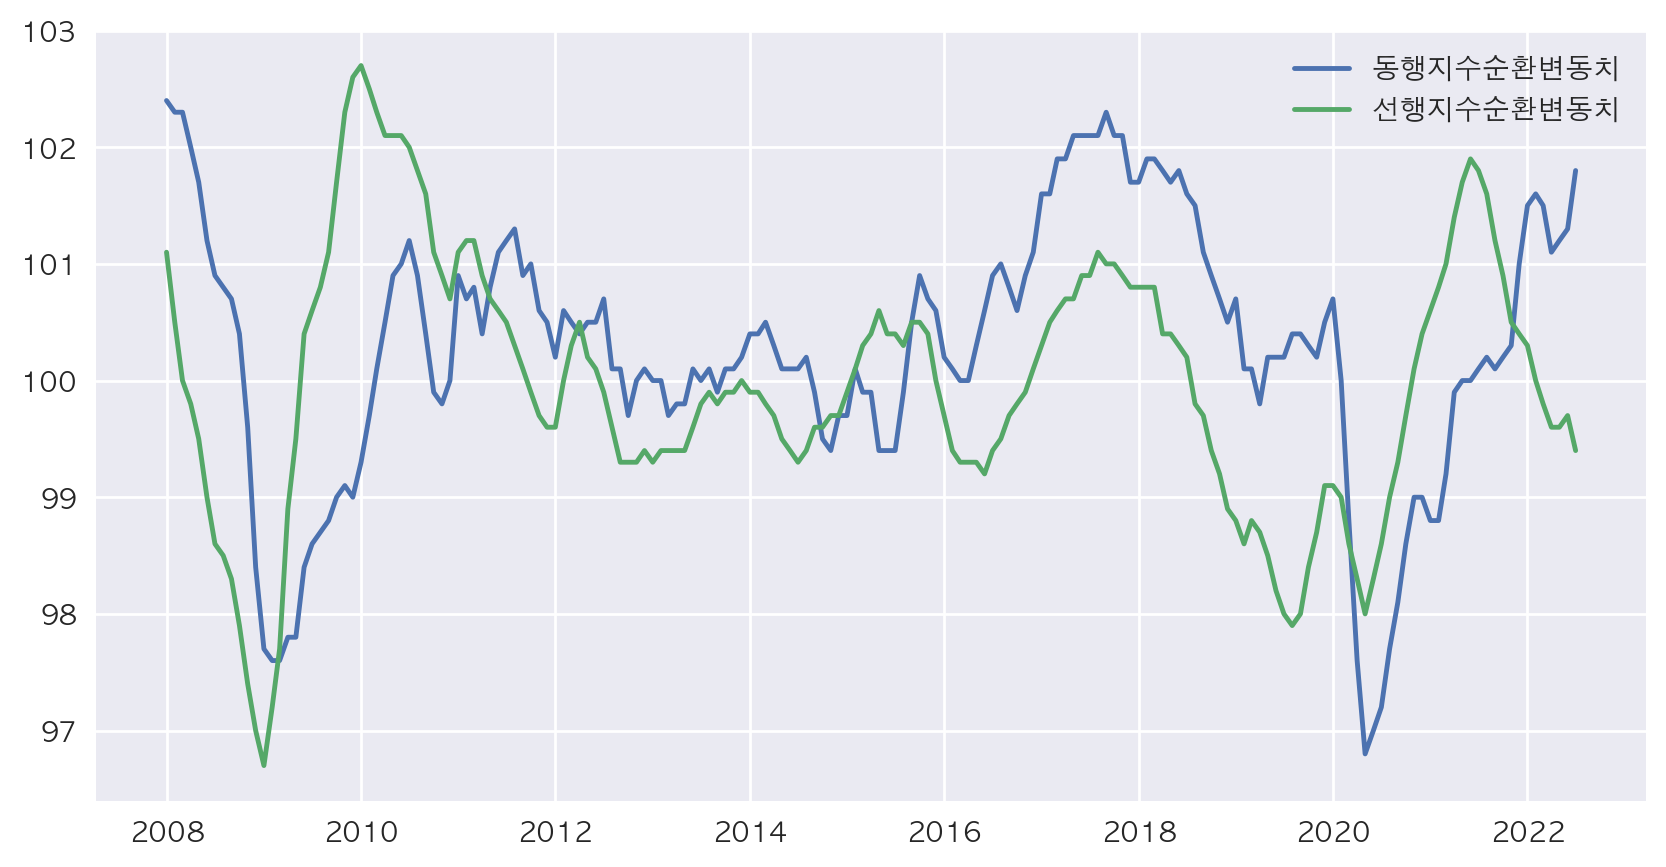

### 보너스
- KOSPI와 함께 시각화 하기

In [1]:
# !pip install -U finance-datareader

In [6]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd

# 한국거래소 상장종목 전체
kospi = fdr.DataReader('KS11', '2008')
kospi.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,1853.45,1891.45,1892.50,1852.78,247090000.0,-0.0230
2008-01-03,1852.73,1834.44,1858.08,1821.61,253670000.0,-0.0004
2008-01-04,1863.90,1853.54,1869.76,1824.41,299080000.0,0.0060
2008-01-07,1831.14,1815.73,1840.99,1814.35,268130000.0,-0.0176
2008-01-08,1826.23,1838.64,1840.62,1818.69,296570000.0,-0.0027


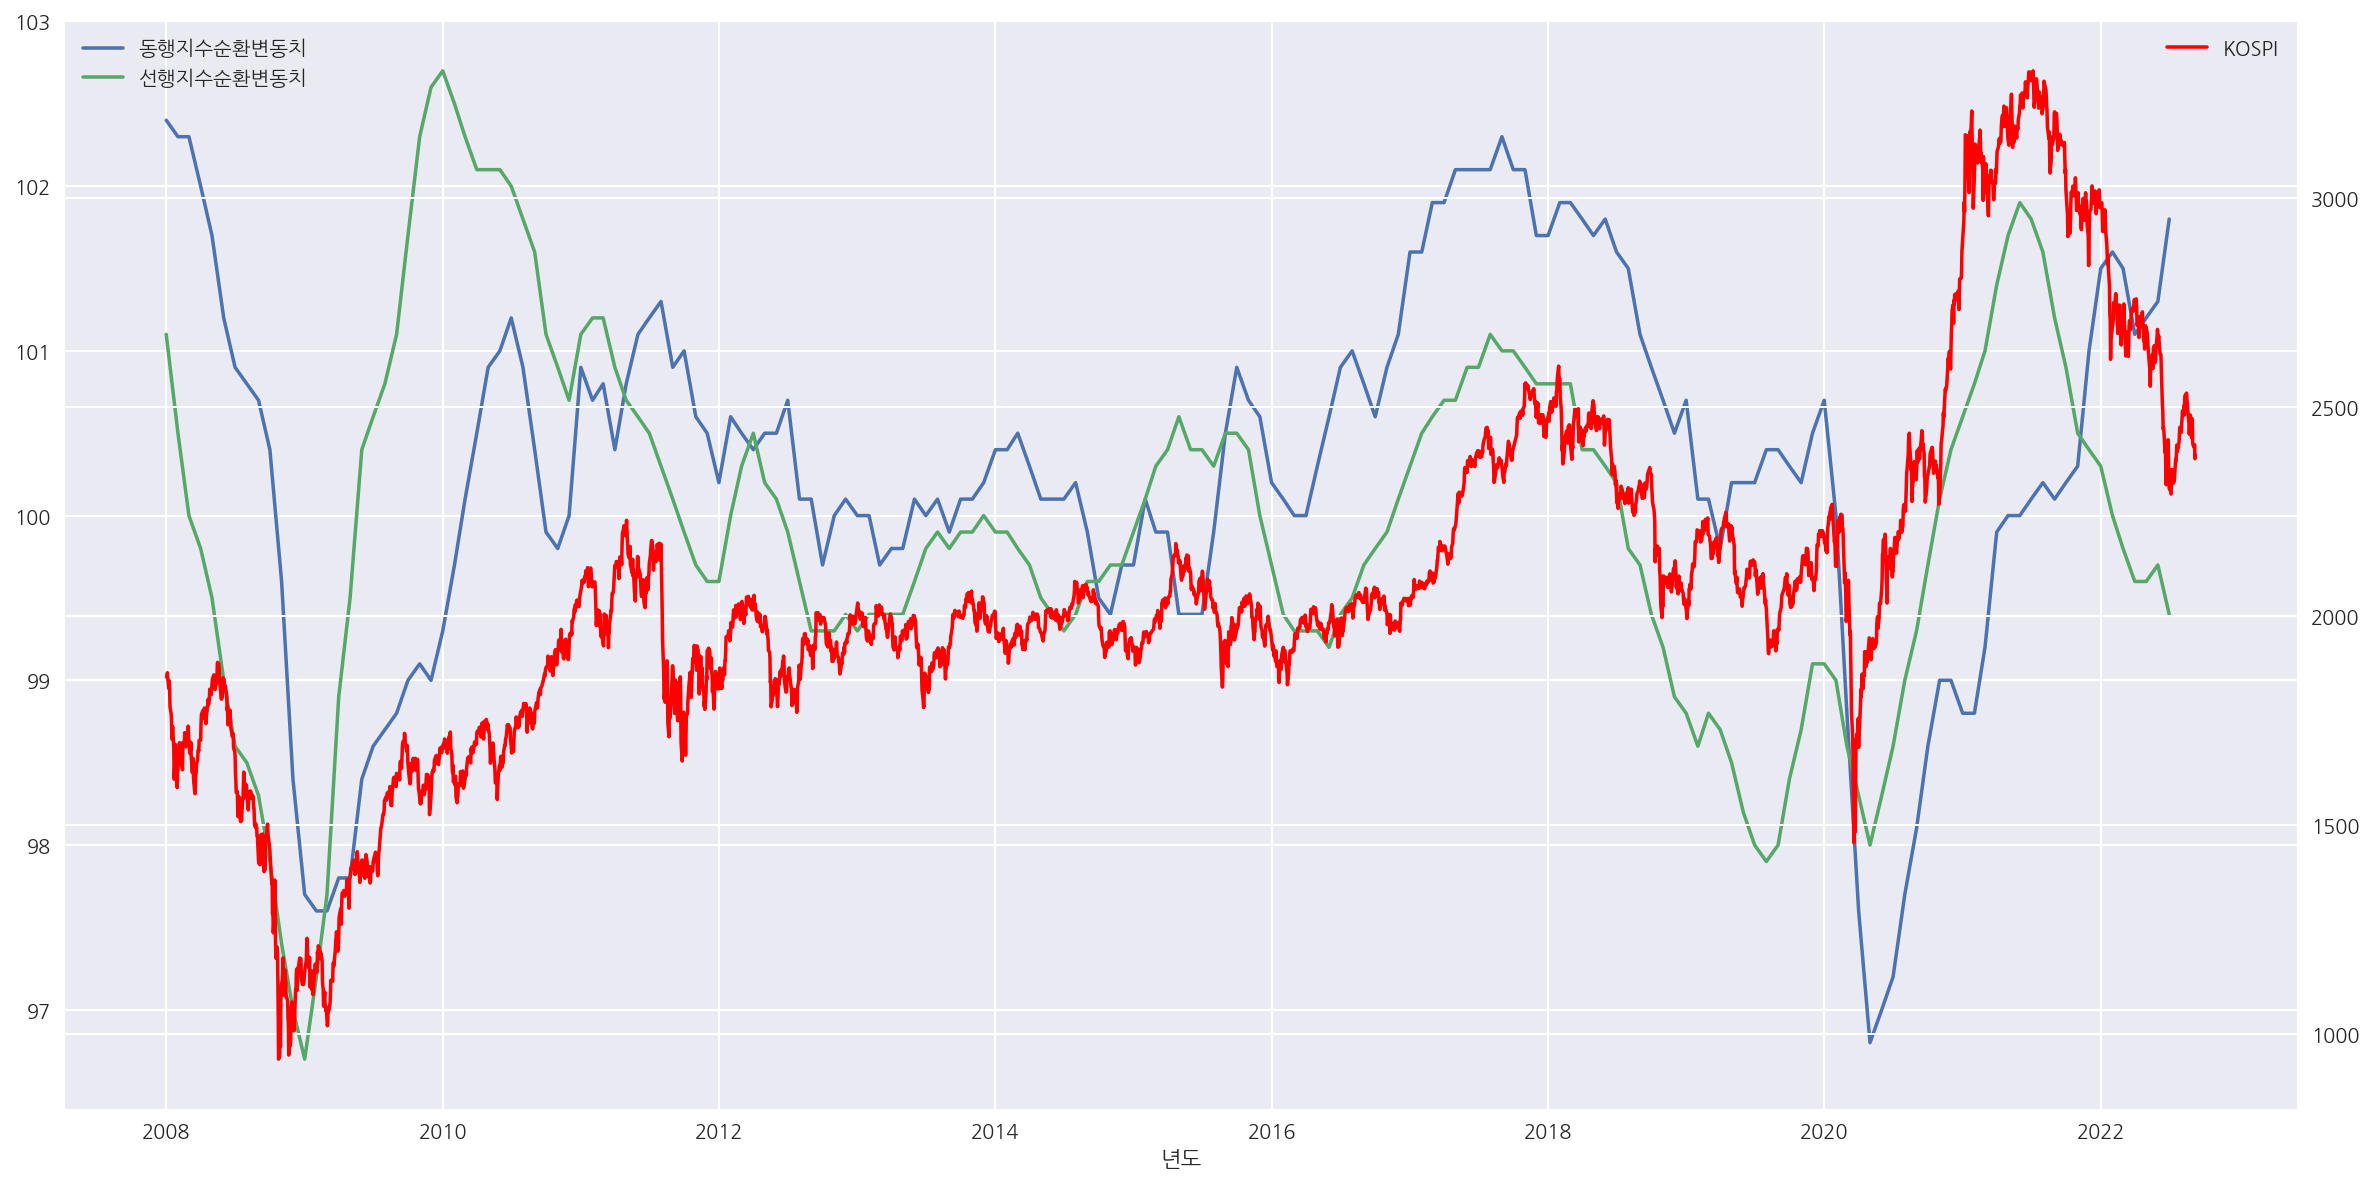